<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SVD**

### (1) SVD란?
- singular value decomposition
- PCA는 정방행렬(행, 열 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 다른 행렬도 가능

### (2) 수학적 분석
- $A=U\sum _{\ }^{\ }{V}^T$
- SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터, 모든 특이 벡터는 서로 직교하는 성질을 가짐
- $\sum$는 대각행렬
- 차원이 m x n일 때 $U$의 차원이 m x m, $\sum$의 차원이 m x n, ${V}^T$의 차원이 n x n으로 분해됨
- truncated SVD는 $\sum$의 대각원소 중 상위 몇 개만 추출해서 대응하는 $U, V$도 함께 제거해 더욱 차원을 줄임

In [1]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4, 4)
np.round(a, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [2]:
# 위 행렬에서 SVD를 적용해 U, sigma, Vt를 도출하기
U, Sigma, Vt = svd(a)
print('U :\n', U)
print('sigma :\n', Sigma)
print('Vt :\n', Vt)

U :
 [[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]
sigma :
 [3.4229581  2.02287339 0.46263157 0.07935069]
Vt :
 [[ 0.04100747  0.22367823  0.78643002 -0.57429458]
 [-0.20019867  0.56209596  0.37041464  0.71187191]
 [-0.77847455  0.3945136  -0.33259252 -0.3573774 ]
 [-0.5934781  -0.69164673  0.36565426  0.18895901]]


In [3]:
# 복원
sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [4]:
# 데이터 세트가 로우 간 의존성이 있을 경우
# ex) 3번째로우 = 1번째로우 + 2번째로우, 4번째로우 = 1번째 로우

a[2] = a[0] + a[1]
a[3] = a[0]
np.round(a, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

In [5]:
U, Sigma, Vt = svd(a)
np.round(Sigma, 3)

array([2.663, 0.807, 0.   , 0.   ])

In [6]:
# Sigma 값 중 2개가 0으로 변함
# = 선형 독립인 로우 벡터의 개수가 2개라는 의미
# = 행렬의 Rank가 2

# 원본 행렬 복원
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
np.round(a_, 3)

(4, 2) (2, 2) (2, 4)


array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

### (3) Truncated SVD

In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(21)
matrix = np.random.random((6, 6))
print('원본 행렬 : ', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원 : ', U.shape, Sigma.shape, Vt.shape)
print('\n시그마 행렬', Sigma)

원본 행렬 :  [[0.04872488 0.28910966 0.72096635 0.02161625 0.20592277 0.05077326]
 [0.30227189 0.66391029 0.30811439 0.58359128 0.06957095 0.86740448]
 [0.13324052 0.17812466 0.49592955 0.86369964 0.75894384 0.97048513]
 [0.75930255 0.38425003 0.40871833 0.71336043 0.27066977 0.85410287]
 [0.91316397 0.76075607 0.51666854 0.16783577 0.29869229 0.28394305]
 [0.32721258 0.46014033 0.54436836 0.21740087 0.79986833 0.72668445]]

분해 행렬 차원 :  (6, 6) (6,) (6, 6)

시그마 행렬 [2.95668773 1.02918132 0.80828638 0.48142609 0.37477594 0.13880505]


In [10]:
# truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\ntruncated SVD 분해 행렬 차원 : ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\n시그마 행렬', Sigma_tr)

matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
print('분해 후 복원 행렬', matrix_tr)


truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

시그마 행렬 [0.48142609 0.80828638 1.02918132 2.95668773]
분해 후 복원 행렬 [[ 0.00222862  0.3867835   0.63436996 -0.04337066  0.24736598  0.09490969]
 [ 0.34727072  0.57086908  0.3926838   0.65882151  0.03175713  0.81319366]
 [ 0.12037082  0.19718315  0.46787356  0.77953705  0.75810557  1.0443682 ]
 [ 0.70042425  0.51277316  0.30154029  0.67120853  0.33061613  0.87258649]
 [ 0.92352374  0.73253771  0.53265522  0.12875768  0.279496    0.32401804]
 [ 0.37447425  0.36891466  0.63651796  0.35029129  0.77017476  0.61954094]]


### (4) 사이킷런 TruncatedSVD 클래스

Text(0, 0.5, 'truncatedSVD comp2')

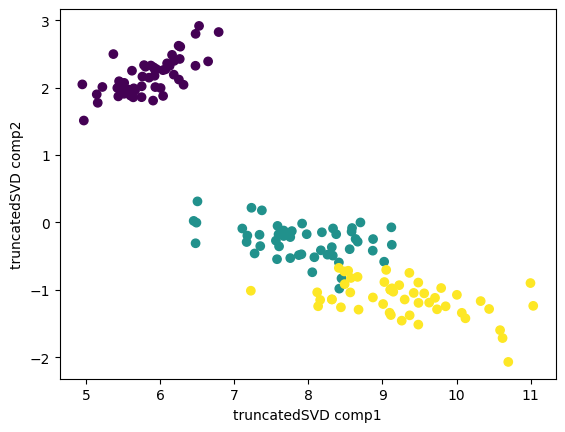

In [12]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('truncatedSVD comp1')
plt.ylabel('truncatedSVD comp2')

### (5) 추가 TMI

- PCA가 SVD 알고리즘 기반으로 구현됨, 하지만 PCA는 밀집 행렬에 대한 변환만 가능하며, SVD는 희소 행렬에 대한 변환도 가능하다.
- SVD는 PCA와 유하사게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용된다.
- SVD 텍스트의 토픽 모델링 기법인 LSA의 기반 알고리즘이다.